<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Домашнее задание 3. Математика для data sciense. Нетология.

Решить систему линейных уравнений:

![alt text](https://italiandirectory.eu/wp-content/ql-cache/quicklatex.com-34a5602e13176cbddcfd35cca34478fe_l3.svg)

In [2]:
a = np.array([[2,1,1], [1,3,2],[1,0,0]])
b = np.array([4,5,6])
x = np.linalg.solve(a, b)
x

array([  6.,  15., -23.])

Анна выбирает тарифный план для телефонной связи. Первый план, T1, стоит 20 долларов в месяц, каждый звонок стоит 25 центов в минуту. Второй тарифный план, T2, стоит 40долларов в месяц, но звонки стоят 8 центов в минуту. Какой план ей выбрать, если Анна звонит не более 117 минут в месяц?

Составим задачу в системе линейных уравнений. 

Количество минут - независимая переменная, будет нашим x. Стоимость тарифа - зависимая величина, будет нашим y. 

Написать систему уравнений для данной задачи, построить график, найти точку пересечения прямых. 
Сделать вывод о том, какой тариф использовать лучше для Анны.

система линейных уравнений

$$\left\{\begin{matrix}
y=0.25x + 20\\ 
y=0.08x + 40\\
x<=117      
\end{matrix}\right.$$

$$\boldsymbol{A}=\begin{bmatrix}
0.25 & -1\\ 
0.08 & -1
\end{bmatrix}$$

$$b=\begin{bmatrix}
-20\\ 
-40\end{bmatrix}$$

$$\boldsymbol{x}=\boldsymbol{A^{-1}b}$$

In [82]:
A = np.array([[0.25,-1],[0.08,-1]])
A_inv = np.linalg.inv(A)
b = np.array([[-20], [-40]])
x = A_inv.dot(b)
x

array([[117.64705882],
       [ 49.41176471]])

найдем решение графически, прямые пересекаются в точке [117; 49]

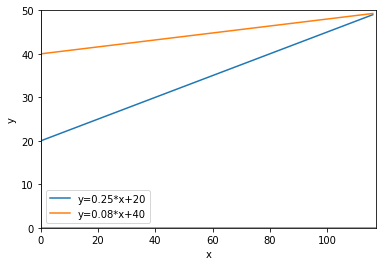

In [83]:
x = np.arange(0, 117)
y = 0.25*x + 20
y1 = 0.08*x + 40

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(0, 117)
plt.ylim(0, 50)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['y=0.25*x+20','y=0.08*x+40'])
plt.show()
plt.close()

### до 117 минут выгоднее брать тариф Т1

Загрузить датасет Boston houses. 
Выбрать 3-хмерное пространство (3 атрибута из таблицы), взять 3 дома по данному трехмерному пространству, доказать, что данные векторы не компланарны.

In [84]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [91]:
a = np.array(boston.loc[0, ['CRIM','B','PTRATIO']])
b = np.array(boston.loc[1,['CRIM','B','PTRATIO']])
c = np.array(boston.loc[20,['CRIM','B','PTRATIO']])

In [92]:
a = np.transpose([a])
b = np.transpose([b])
c = np.transpose([c])

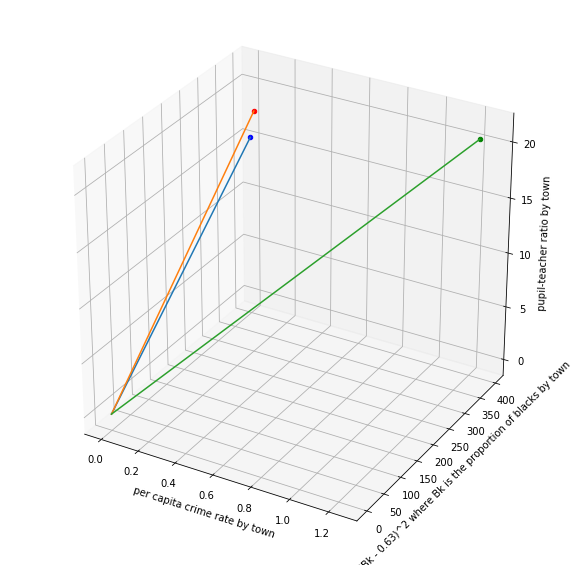

In [103]:
# изобразим вектора графически

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')


ax.plot([0,a[0]], [0,a[1]], [0,a[2]])
ax.plot([0,b[0]], [0,b[1]], [0,b[2]])
ax.plot([0,c[0]], [0,c[1]], [0,c[2]])

ax.scatter(a[0], a[1], a[2], c='b')
ax.scatter(b[0], b[1], b[2], c='r')
ax.scatter(c[0], c[1], c[2], c='g')

ax.set_xlabel('per capita crime rate by town')
ax.set_ylabel('1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town')
ax.set_zlabel('pupil-teacher ratio by town')
plt.show()

In [214]:
ab = np.hstack((a, b))
A = np.hstack((ab,c))

In [215]:
print(np.linalg.det(A))

1182.1235962899989


### определитель матрица не равен 0, значит векторы не компланарны

Для матрицы, полученной на предыдущей задачи, посчитать собственный вектор(v). Умножить собственный вектор на матрицу (Av). Сделать график. Во сколько раз Av отличается от v?

In [258]:
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt

e_vals, e_vecs = LA.eig(A)
print('Исходная матрица: \n', A)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[6.32000e-03 2.73100e-02 1.25179e+00]
 [3.96900e+02 3.96900e+02 3.76570e+02]
 [1.53000e+01 1.78000e+01 2.10000e+01]]
Собственные вектора: 
 [[-2.02702606e-04 -4.52431163e-01  2.40742534e-01]
 [-9.98975684e-01  8.09492230e-01 -7.86302797e-01]
 [-4.52497759e-02 -3.74203650e-01  5.69008738e-01]]
Собственные значения:  [414.0377152    0.99280632   2.87579847]


In [302]:
v = e_vecs.T[0]

In [307]:
Av = A.dot(v)
Av1 = A.dot(e_vecs.T[1])
Av2 = A.dot(e_vecs.T[2])

In [310]:
# увеличим длину вектора, чтобы увидеть его на графике
v100 = v*100
v1 = e_vecs.T[1]
v2 = e_vecs.T[2]

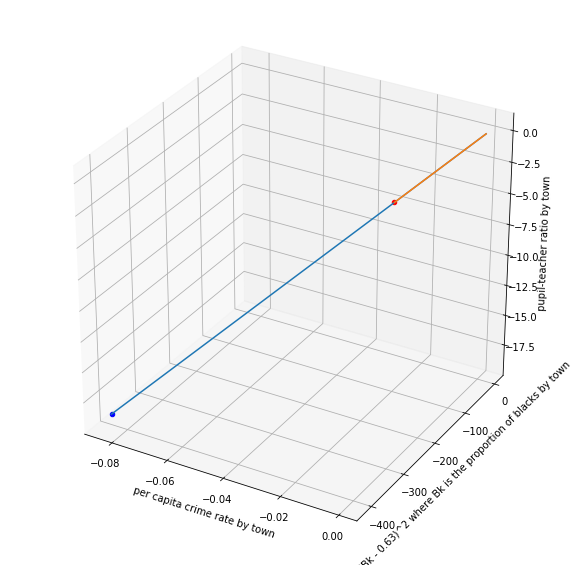

In [312]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

ax.plot([0,Av[0]], [0,Av[1]], [0,Av[2]])
#ax.plot([0,Av1[0]], [0,Av1[1]], [0,Av1[2]])
#ax.plot([0,Av2[0]], [0,Av2[1]], [0,Av2[2]])

ax.plot([0,v100[0]], [0,v100[1]], [0,v100[2]])
#ax.plot([0,v1[0]], [0,v1[1]], [0,v1[2]])
#ax.plot([0,v2[0]], [0,v2[1]], [0,v2[2]])

ax.scatter(Av[0], Av[1], Av[2], c='b')
ax.scatter(v100[0], v100[1], v100[2], c='r')


ax.set_xlabel('per capita crime rate by town')
ax.set_ylabel('1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town')
ax.set_zlabel('pupil-teacher ratio by town')
plt.show()

In [313]:
print('Av отличается от v в {} раз'.format([Av/v][0][0]))

Av отличается от v в 414.03771520323875 раз


Задание повышенного уровня.

Как посчитать интеграл полинома, полученного в домашнем задании №2, при полиномиальной регрессии?

In [420]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
price = boston_dataset.target
  
x = boston.LSTAT

x = np.array(x).reshape(-1, 1)
y = price

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression()
model = lin2.fit(X_poly, y)

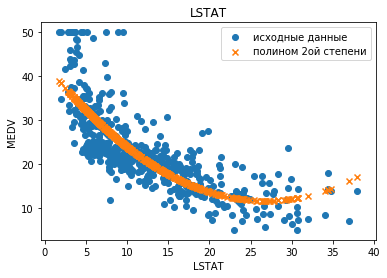

In [453]:
y_pred = model.predict(poly.fit_transform(x))
plt.scatter(x, y, marker='o')
plt.scatter(x, y_pred, marker='x')
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(['исходные данные', 'полином 2ой степени'])
plt.show()

In [516]:
coef = model.coef_
c = model.intercept_

In [527]:
def poli(x):
    y = coef[2]*(x**2) + coef[1]*x + c
    return y

In [532]:
#проверим, что собрали нужную функцию, сопоставив ее с моделью
y1 = [poli(i) for i in (x)]

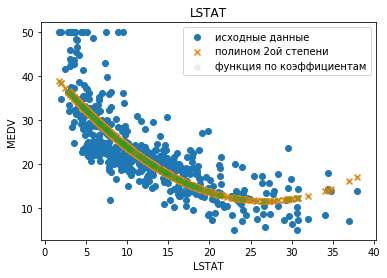

In [555]:
#совпало :)
plt.scatter(x, y, marker='o')
plt.scatter(x, y_pred, marker='x')
plt.scatter(x, y1, alpha=0.1, marker='p')
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(['исходные данные', 'полином 2ой степени','функция по коэффициентам'])
plt.show()

In [556]:
x_min = x.min()
x_max = x.max()

In [557]:
import scipy.integrate as spint
def f(x):
    return coef[2]*(x**2) + coef[1]*x + c

print(spint.quad(f,x_min,x_max))

(669.7131464908402, 7.435309551282913e-12)
